In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('BRCA Data.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [7]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [8]:
df['Gender'].value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

* Highly Imbalanced Data

In [9]:
df['Patient_Status'].value_counts()

Patient_Status
Alive    255
Dead      62
Name: count, dtype: int64

* Imbalanced

# Visualization

In [10]:
for i in (df.iloc[:,2:]) :
    patient_count = df[i].value_counts()
    figure = px.pie(values= patient_count.values,names = patient_count.index,
                hole=0.6,title= i)
    figure.show()

* Here Gender,ER Status,PR Status,HER2 Satus,Histology and Patient Status are highly imbalanced.

In [11]:
df.drop(['Patient_ID','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],
        axis=1,inplace=True)

In [12]:
df.head(3)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive


# Balancing Data
### Random over sampling

In [13]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
ro_x,ro_y = ro.fit_resample(df.iloc[:,:-1],df['Patient_Status'])

In [14]:
data = pd.concat([ro_x,ro_y],axis=1)

In [15]:
data.head(3)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive


In [16]:
status = data['Patient_Status'].value_counts()
figure = px.pie(values= status.values,names= status.index,hole= 0.6
                ,title= 'Patient Status(Balanced)')
figure.show()

In [17]:
from pycaret.classification import *

In [18]:
cancer = setup(data= data,target= 'Patient_Status',
               normalize= True,
               transformation= True, 
               log_experiment= False,
               remove_multicollinearity= True,
               numeric_imputation= 'median',
               fold = 5,train_size= 0.8)

,Description,Value
0,Session id,5375
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 11)"
5,Transformed data shape,"(510, 18)"
6,Transformed train set shape,"(408, 18)"
7,Transformed test set shape,"(102, 18)"
8,Numeric features,5
9,Categorical features,5


### All available configuration

In [19]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [37]:
get_config('X_transformed').head(3)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_II,Tumour_Stage_III,Tumour_Stage_I,Histology_Infiltrating Lobular Carcinoma,Histology_Infiltrating Ductal Carcinoma,Histology_Mucinous Carcinoma,HER2 status,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Simple Mastectomy,Surgery_type_Other
196,1.273533,-0.132123,2.149072,0.417343,-0.444699,-0.310641,0.828221,-0.577350,-0.431331,1.815141,-1.625687,-0.208514,-0.25,2.040725,-0.641689,-0.493865,-0.683832
192,-1.369294,-0.132123,0.308285,0.265974,-1.537715,-0.496985,0.828221,-0.577350,-0.431331,1.815141,-1.625687,-0.208514,-0.25,-0.490022,1.558387,-0.493865,-0.683832
493,-0.889057,-0.132123,-1.033406,0.066096,0.899537,0.950280,-1.207407,1.732051,-0.431331,-0.550921,0.615125,-0.208514,-0.25,-0.490022,1.558387,-0.493865,-0.683832


In [20]:
get_config('X_test_transformed').head(3)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_II,Tumour_Stage_III,Tumour_Stage_I,Histology_Infiltrating Lobular Carcinoma,Histology_Infiltrating Ductal Carcinoma,Histology_Mucinous Carcinoma,HER2 status,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Simple Mastectomy,Surgery_type_Other
423,0.841815,-0.132123,-0.551574,-0.228363,0.364814,0.155068,0.828221,-0.57735,-0.431331,1.815141,-1.625687,-0.208514,-0.25,-0.490022,-0.641689,-0.493865,1.462348
457,0.066390,-0.132123,-1.072473,-0.823006,-0.923082,-0.685301,0.828221,-0.57735,-0.431331,-0.550921,0.615125,-0.208514,-0.25,-0.490022,-0.641689,-0.493865,1.462348
303,1.616982,-0.132123,-1.936664,0.116287,-1.065870,-0.287700,0.828221,-0.57735,-0.431331,1.815141,-1.625687,-0.208514,-0.25,-0.490022,-0.641689,2.024846,-0.683832


# Buildin ML Models
* 'lr' - Logistic Regression
    * 'knn' - K Neighbors Classifier
    * 'nb' - Naive Bayes
    * 'dt' - Decision Tree Classifier
    * 'svm' - SVM - Linear Kernel
    * 'rbfsvm' - SVM - Radial Kernel
    * 'gpc' - Gaussian Process Classifier
    * 'mlp' - MLP Classifier
    * 'ridge' - Ridge Classifier
    * 'rf' - Random Forest Classifier
    * 'qda' - Quadratic Discriminant Analysis
    * 'ada' - Ada Boost Classifier
    * 'gbc' - Gradient Boosting Classifier
    * 'lda' - Linear Discriminant Analysis
    * 'et' - Extra Trees Classifier
    * 'xgboost' - Extreme Gradient Boosting
    * 'lightgbm' - Light Gradient Boosting Machine
    * 'catboost' - CatBoost Classifier

In [21]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9268,0.9813,0.9268,0.9278,0.9268,0.8537,0.8547
1,0.9512,0.9949,0.9512,0.9523,0.9512,0.9024,0.9035
2,0.8659,0.9857,0.8659,0.8844,0.8642,0.7317,0.7500
3,0.9136,0.9756,0.9136,0.9201,0.9133,0.8274,0.8338
4,0.9136,0.9835,0.9136,0.9158,0.9134,0.8270,0.8293
Mean,0.9142,0.9842,0.9142,0.9201,0.9138,0.8284,0.8342
Std,0.0278,0.0063,0.0278,0.0219,0.0284,0.0556,0.0497


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9264,0.9775,0.9264,0.9307,0.9262,0.8528,0.8571,0.1920
rf,Random Forest Classifier,0.9142,0.9842,0.9142,0.9201,0.9138,0.8284,0.8342,0.2260
xgboost,Extreme Gradient Boosting,0.8700,0.9687,0.8700,0.8854,0.8685,0.7401,0.7552,0.1620
lightgbm,Light Gradient Boosting Machine,0.8700,0.9488,0.8700,0.8870,0.8684,0.7400,0.7568,0.2160
gbc,Gradient Boosting Classifier,0.8602,0.9529,0.8602,0.8785,0.8579,0.7206,0.7382,0.1760
dt,Decision Tree Classifier,0.8212,0.8210,0.8212,0.8575,0.8159,0.6422,0.6772,0.0960
ada,Ada Boost Classifier,0.7328,0.8186,0.7328,0.7379,0.7316,0.4656,0.4706,0.1580
knn,K Neighbors Classifier,0.6593,0.7194,0.6593,0.6672,0.6557,0.3185,0.3263,0.1020
ridge,Ridge Classifier,0.6029,0.6116,0.6029,0.6047,0.6006,0.2056,0.2074,0.0980
nb,Naive Bayes,0.6004,0.6081,0.6004,0.6050,0.5943,0.2009,0.2053,0.1000


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5375, verbose=0,
                     warm_start=False)

In [23]:
et = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

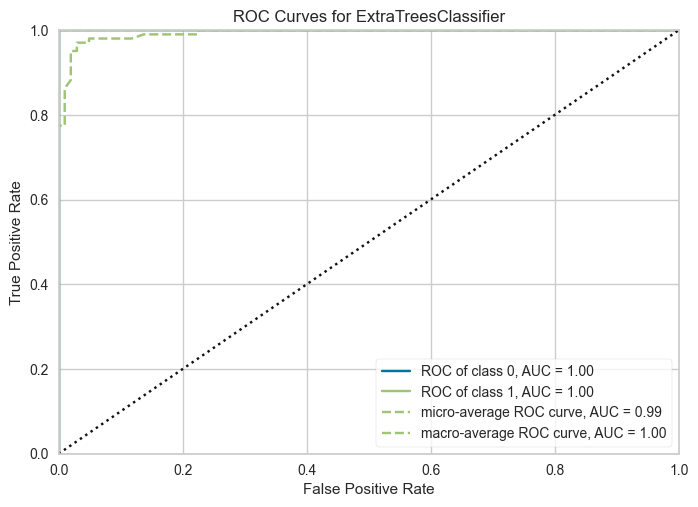

In [25]:
plot_model(et,plot = 'auc')

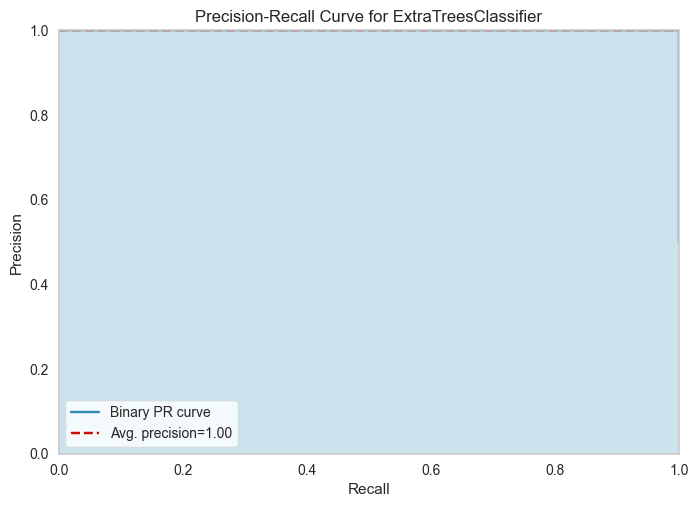

In [27]:
plot_model(et,plot='pr')

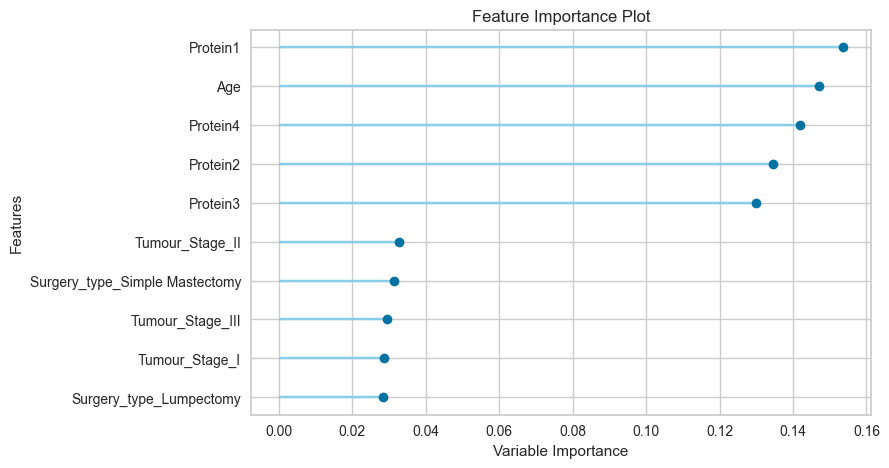

In [28]:
plot_model(et,plot='feature')

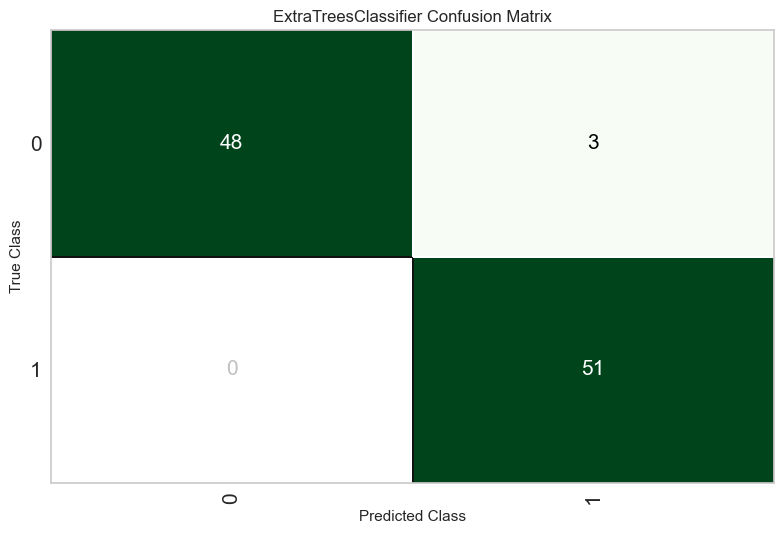

In [30]:
plot_model(et,plot= 'confusion_matrix')

In [31]:
unseen_prediction = predict_model(et,data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9905,1.0000,0.9905,0.9910,0.9906,0.9705,0.9709


# Save Model

In [ ]:
# save_model(et,'Breast Cancet using Pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_feat

In [33]:
loaded_model = load_model("Breast Cancet using Pycaret")

Transformation Pipeline and Model Successfully Loaded


In [34]:
predict_data = predict_model(loaded_model, data = df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9905,1.0000,0.9905,0.9910,0.9906,0.9705,0.9709
